# Advanced Statistical Analysis: Predicting Iris Species

## Task Overview
In this project, we apply advanced statistical techniques to analyze the Iris dataset. The goal is to uncover hidden patterns and relationships within the data, applying various statistical methods such as regression analysis and hypothesis testing. Additionally, we explore data distributions, correlations, and anomalies to provide valuable insights.


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)

In [39]:
# Convert to DataFrame for better visualization and manipulation
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [25]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and confusion matrix
print(f"Logistic Regression Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Logistic Regression Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



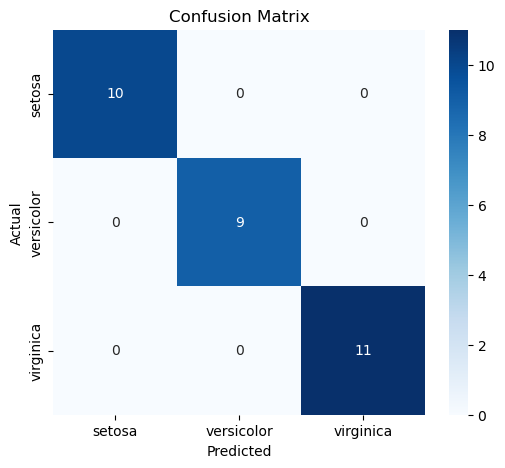

In [26]:
# Visualize the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

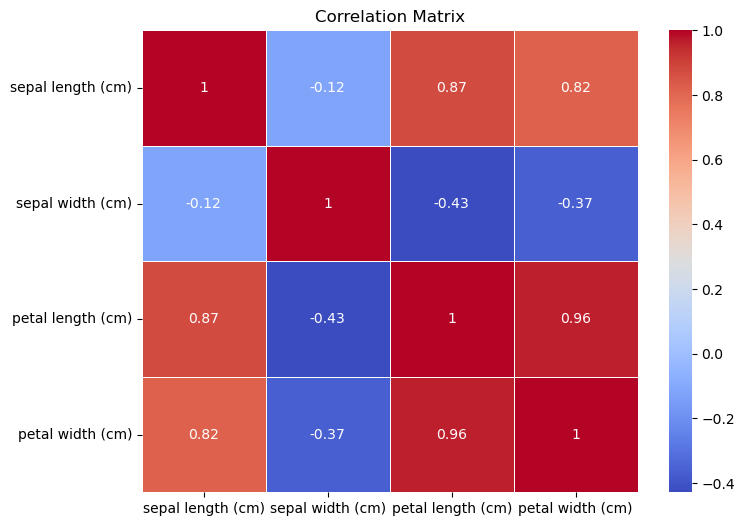

In [27]:
# Correlation matrix
correlation_matrix = pd.DataFrame(X, columns=iris.feature_names).corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from scipy import stats

# T-test between two species for a specific feature (e.g., sepal length)
species_0_sepal_length = X[y == 0, 0]  # Sepal length for species 0
species_1_sepal_length = X[y == 1, 0]  # Sepal length for species 1

t_stat, p_value = stats.ttest_ind(species_0_sepal_length, species_1_sepal_length)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -10.52098626754911, P-Value: 8.985235037487079e-18


**T-Statistic -10.52 suggests a significant difference and the P-value 8.99e-18 strongly supports rejecting the null hypothesis.
We can conclude that there is a statistically significant difference between the variables being tested.**

In [29]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.9733333333333334


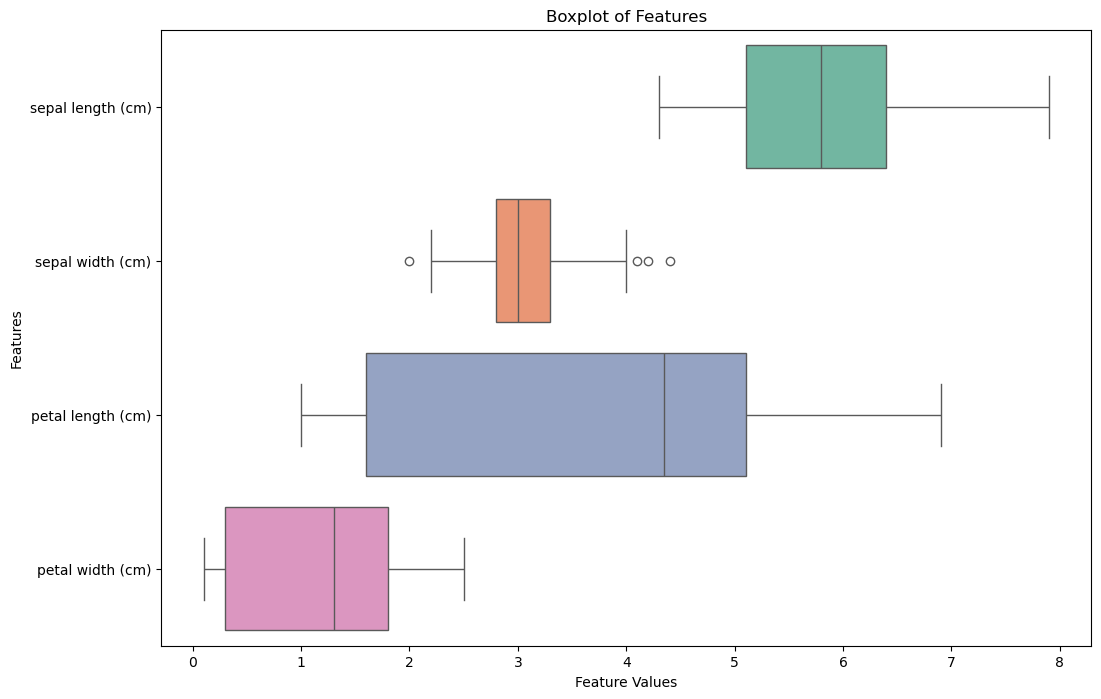

In [40]:
# Create a boxplot for each feature 
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris_df, orient="h", palette="Set2")
plt.title("Boxplot of Features")
plt.xlabel("Feature Values")
plt.ylabel("Features")
plt.show()

In [ ]:
#Conclude the analysis
print("Analysis complete. The Logistic Regression model has been trained and evaluated on the Iris dataset.")
# Save the model using joblib
import joblib
joblib.dump(model, 'logistic_regression_iris_model.pkl')
# Load the model
loaded_model = joblib.load('logistic_regression_iris_model.pkl')

Analysis complete. The Logistic Regression model has been trained and evaluated on the Iris dataset.
